In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import recall_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix


In [162]:
df = pd.read_csv("data_synthetic.tsv", encoding="utf-8", sep="\t")
df

,Sentence,Error
0,שלשים ותשעה מפקדים,1
1,שלשים ותשע מפקדים,0
2,שבעים ושניים אגרטלים,1
3,שבעים ושתים אגרטלים,0
4,חמישים וחמישה מכוניות,0
...,...,...
595,שלשים ושמונה מכנסיים,1
596,שמונים נדנדות,1
597,שמונים נדנדות,1
598,מאה ספסלים,1


## Question 2 - Loading TSV

In [163]:
df

,Sentence,Error
0,שלשים ותשעה מפקדים,1
1,שלשים ותשע מפקדים,0
2,שבעים ושניים אגרטלים,1
3,שבעים ושתים אגרטלים,0
4,חמישים וחמישה מכוניות,0
...,...,...
595,שלשים ושמונה מכנסיים,1
596,שמונים נדנדות,1
597,שמונים נדנדות,1
598,מאה ספסלים,1


## Question 4


In [183]:
attractions = df["Error"].value_counts()
print("Number of different attractions")
len(attractions)

Number of different attractions


2

In [165]:
avg_words_censored_desc_col = df['Sentence'].apply(lambda x: len(x.split()))
print('Censored_Desc average len: ')
avg_words_censored_desc_col.mean()

Censored_Desc average len: 


2.7333333333333334

## Question 5

### Split Data

In [166]:
df_no_Error = df.drop(columns=['Error'])

X_train, X_test, y_train, y_test = train_test_split(df_no_Error, df['Error'], test_size=0.2, random_state=42)

In [167]:
def get_hebrew_stopwords():
    stop_path = "heb_stopwords.txt"
    with open(stop_path, encoding="utf-8") as in_file:
        lines = in_file.readlines()
        res = [l.strip() for l in lines]
    return res


In [168]:
heb_stop_words = get_hebrew_stopwords()


In [169]:
count_vect = CountVectorizer(ngram_range=(1,2),  stop_words=heb_stop_words)
# X_train_counts = count_vect.fit_transform(X_train["Censored_Desc"])
tf_transformer=TfidfTransformer()

## Question 6

In [170]:
from sklearn.metrics import confusion_matrix,precision_score
from sklearn.metrics import recall_score,f1_score,accuracy_score

def evaluate(predicted_labels):
        prec_mic = precision_score(y_test, 
                                predicted_labels,
                                average="micro")

        rec_mic=recall_score(y_test, 
                                predicted_labels,
                                average="micro")

        f1_mic=f1_score(y_test, 
                        predicted_labels,
                        average="micro")
        print(f"Micro precision:{prec_mic}, recall:{rec_mic}, f1:{f1_mic}")
        prec_mac=precision_score(y_test, 
                                predicted_labels,
                                average="macro")

        rec_mac=recall_score(y_test, 
                                predicted_labels,
                                average="macro")

        f1_mac=f1_score(y_test, 
                        predicted_labels,
                        average="macro")
        print(f"Macro precision:{prec_mac}, recall:{rec_mac}, f1:{f1_mac}")


        acc=accuracy_score(y_test, 
                            predicted_labels)

        print(f"Accuracy: {acc}")
        cm=confusion_matrix(y_test,
                            predicted_labels)
        print(cm)

### Logistic Regression

In [171]:
X_train['Sentence']

145             עשר בניינים
9        ששים ושבע מסדרונות
375      חמישים ואחת תפוחים
523         עשרים ושבע עצים
188       ששים ושישה גלידות
               ...         
71        שמונים ואחת ילדות
106            ארבעה פארקים
270    שלשים ושלושה מכוניות
435      שמונים ותשע עריסות
102      שלשים ושניים סוסים
Name: Sentence, Length: 480, dtype: object

Micro precision:0.6333333333333333, recall:0.6333333333333333, f1:0.6333333333333333
Macro precision:0.5820386510041683, recall:0.5653881002718213, f1:0.5634920634920635
Accuracy: 0.6333333333333333
[[14 29]
 [15 62]]


/Users/noamkesten/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


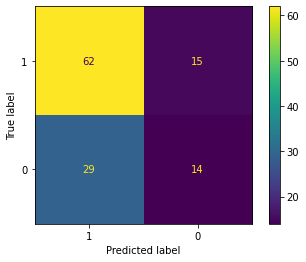

In [184]:
from sklearn.linear_model import LogisticRegression
algo=LogisticRegression()
pipe = Pipeline([('vectorizer', count_vect),
                 ('transformer', tf_transformer),
                 #('feature_select', SelectKBest(chi2, k=20000)),
                 ('algo', algo)])
pipe.fit(X_train['Sentence'], y_train)
# prredicted only one sentence
# predicted = pipe.predict(["שבע סוסים"])
predicted = pipe.predict(X_test['Sentence'])
# show the predicted label
# predicted.tolist()[0]
evaluate(predicted)
plot_confusion_matrix(pipe, X_test['Sentence'], y_test, labels = attractions.keys())

In [173]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


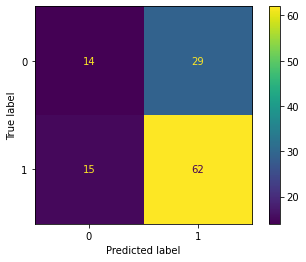

In [174]:
cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Random Forest Classifier

Micro precision:0.675, recall:0.675, f1:0.675
Macro precision:0.640625, recall:0.5978556327393536, f1:0.5962384608748167
Accuracy: 0.675
[[14 29]
 [10 67]]


/Users/noamkesten/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


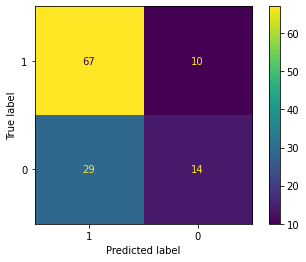

In [194]:
from sklearn.ensemble import RandomForestClassifier
algo=RandomForestClassifier()
pipe = Pipeline([('vectorizer', count_vect),
                 ('transformer', tf_transformer),
                 #('feature_select', SelectKBest(chi2, k=20000)),
                 ('algo', algo)])
pipe.fit(X_train['Sentence'], y_train)
predicted = pipe.predict(X_test['Sentence'])
# prredicted only one sentence
# predicted = pipe.predict(["שבע סוסים"])
# show the predicted label
evaluate(predicted)
# predicted.tolist()[0]
# evaluate(predicted)
plot_confusion_matrix(pipe, X_test['Sentence'], y_test, labels = attractions.keys())
# clf_random_forest = RandomForestClassifier().fit(X_train_tf, y_train)

### # Random classifier - Just for fun :)

In [176]:
kind_unique_values = df["Error"].unique()
kind_unique_values

array([1, 0])

In [177]:
import random

def get_random_value():
    cur_val=np.random.rand()
    return random.choice(kind_unique_values)

In [178]:
random_predicted=[get_random_value() for _ in range(len(X_test))]
y_pred = pd.DataFrame(random_predicted)

evaluate(y_pred)
plot_confusion_matrix(pipe, X_test['Sentence'], y_test, labels = attractions.keys())


Micro precision:0.55, recall:0.55, f1:0.55
Macro precision:0.5294117647058824, recall:0.5312594382361824, f1:0.5278344505974935
Accuracy: 0.55
[[20 23]
 [31 46]]


In [192]:
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Models')
    plt.xlabel('Measures')

[0.58, 0.57, 0.56]
[0.67, 0.62, 0.61]
[0.54, 0.55, 0.54]


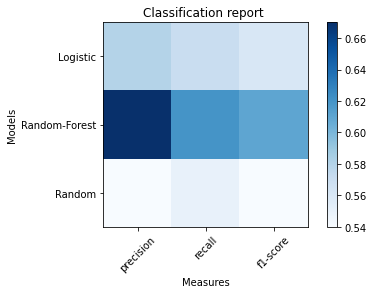

In [193]:
sampleClassificationReport = """             precision    recall  f1-score   support

          Logistic       0.58      0.57      0.56        1
          Random-Forest       0.67      0.62      0.61      1
          Random       0.54      0.55      0.54        1


avg / total       0.6      0.6      0.58       858"""


plot_classification_report(sampleClassificationReport)